# Climate Change Modeling

Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

Load Dataset

In [28]:
df = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin1')

CLEANING DATA

In [ ]:
df = df[df["Element"] == "Temperature change"]
df["Area"] = df["Area"].str.strip().str.lower()


country = "india" 
country_df = df[df["Area"] == country]

year_cols = [col for col in country_df.columns if col.startswith("Y")]
years = [int(col[1:]) for col in year_cols]
temps = country_df[year_cols].mean().values

data = pd.DataFrame({
    "Year": years,
    "Temperature_Anomaly": temps
}).dropna()

VISUALIZE HISTORICAL TRENDS (EDA)

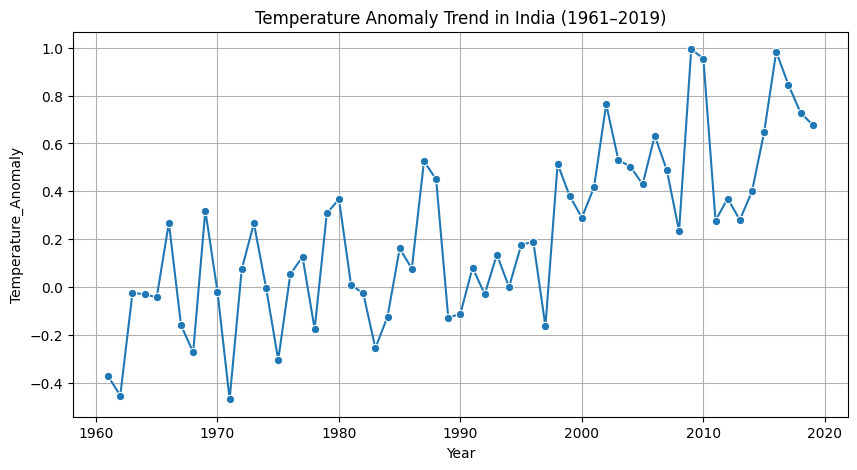

In [43]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="Year", y="Temperature_Anomaly", marker="o")
plt.title(f"Temperature Anomaly Trend in {country.title()} (1961–2019)")
plt.grid(True)
plt.show()

PREPROCESSING

In [31]:
X = data[["Year"]]
y = data["Temperature_Anomaly"]

TRAIN MODELS

In [32]:
models = {
    "Linear": LinearRegression(),
    "Polynomial (deg=3)": make_pipeline(PolynomialFeatures(3), LinearRegression()),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    
    results[name] = {
        "MAE": mean_absolute_error(y, y_pred),
        "MSE": mean_squared_error(y, y_pred),
        "R2": r2_score(y, y_pred)
    }
    predictions[name] = y_pred

MODEL PERFORMANCE COMPARISON

Model Comparison:

                         MAE       MSE        R2
Linear              0.197267  0.056257  0.550279
Polynomial (deg=3)  0.191319  0.053762  0.570225
Random Forest       0.073114  0.008641  0.930922
XGBoost             0.001462  0.000003  0.999974


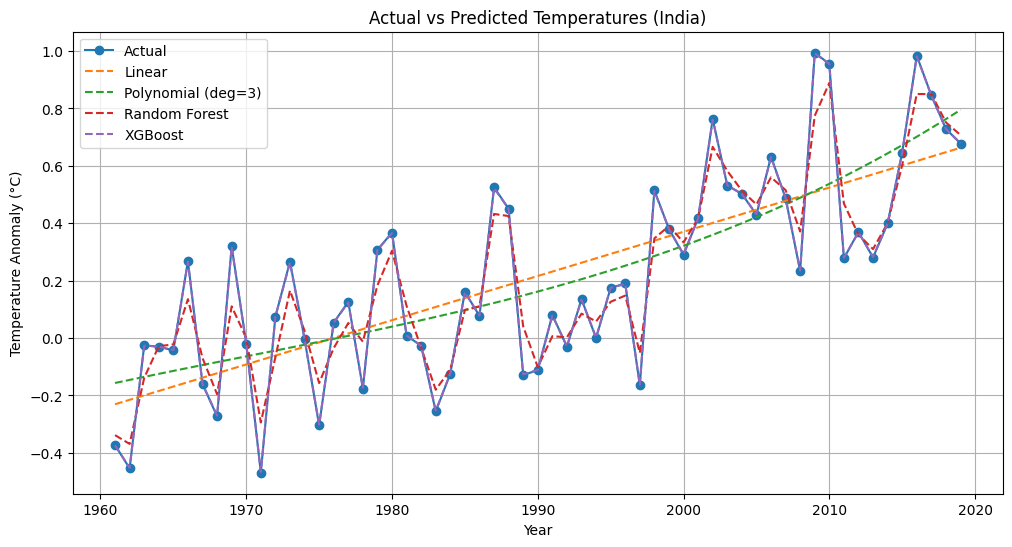

In [33]:
result_df = pd.DataFrame(results).T
print("Model Comparison:\n")
print(result_df)

plt.figure(figsize=(12, 6))
plt.plot(X, y, label="Actual", marker='o')

for name, y_pred in predictions.items():
    plt.plot(X, y_pred, label=name, linestyle='--')

plt.title(f"Actual vs Predicted Temperatures ({country.title()})")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.show()

CHOOSING THE BEST MODEL

In [34]:
best_model_name = result_df["R2"].idxmax()
best_model = models[best_model_name]

print(f"\n Best model: {best_model_name}")



 Best model: XGBoost


FUTURE PROJECTIONS (2020–2035)

In [ ]:
future_years = np.arange(2020, 2036).reshape(-1, 1)  
future_preds = best_model.predict(future_years)

future_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_Temp_Anomaly": future_preds
})

print("Future Projections (2020–2035):")
print(future_df)

Future Projections (2020–2035):
    Year  Predicted_Temp_Anomaly
0   2020                 0.67861
1   2021                 0.67861
2   2022                 0.67861
3   2023                 0.67861
4   2024                 0.67861
5   2025                 0.67861
6   2026                 0.67861
7   2027                 0.67861
8   2028                 0.67861
9   2029                 0.67861
10  2030                 0.67861
11  2031                 0.67861
12  2032                 0.67861
13  2033                 0.67861
14  2034                 0.67861
15  2035                 0.67861


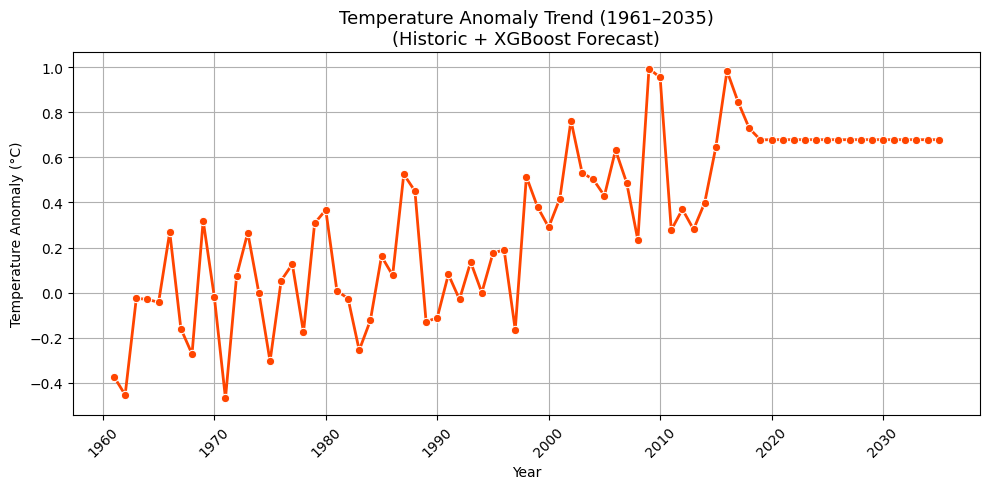

In [41]:
df = df[df["Element"] == "Temperature change"]
df["Area"] = df["Area"].str.strip().str.lower()
df_country = df[df["Area"] == "india"]

year_cols = [col for col in df_country.columns if col.startswith("Y")]
years = [int(col[1:]) for col in year_cols]
temps = df_country[year_cols].mean().values

historic_df = pd.DataFrame({
    "Year": years,
    "Anomaly": temps
}).dropna()

future_df = future_df.rename(columns={"Predicted_Temp_Anomaly": "Anomaly"})

combined_df = pd.concat([historic_df, future_df], ignore_index=True)


plt.figure(figsize=(10, 5))
sns.lineplot(data=combined_df, x="Year", y="Anomaly", marker="o", linewidth=2, color="orangered")
plt.title("Temperature Anomaly Trend (1961–2035)\n(Historic + XGBoost Forecast)", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
